In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

from KETIPrePartialDataPreprocessing import main

inputType ='influx' # or file
refine_param = {
    "removeDuplication":{"flag":True},
    "staticFrequency":{"flag":True}
}
outlier_param  = {
    "certainOutlierToNaN":{"flag":True},
    "uncertainOutlierToNaN":{
        "flag":True,
        "param":{"neighbor":[0.3,0.3]}
    },
    "data_type":"air"
}
model_file = os.path.join(os.getcwd(),'data_imputation','DL','brits', 'model', 'air_indoor_경로당', 'ICL1L2000234','in_temp.pth')
json_file = os.path.join(os.getcwd(),'data_imputation','DL','brits', 'model', 'air_indoor_경로당', 'ICL1L2000234','in_temp.json')
print(model_file)
imputation_param = {
    "serialImputation":{
        "flag":True,
        "imputation_method":[{"min":0,"max":2,"method":"linear", "parameter":{}}, 
                             {"min":3,"max":6,"method":"brits", "parameter":{"mode_address":[model_file, json_file]}}],
        "totalNanLimit":90
    }
}

/home/stoh/Documents/GitHub/KETIPrePartialDataPreprocessing/data_imputation/DL/brits/model/air_indoor_경로당/ICL1L2000234/in_temp.pt


In [2]:
imputation_param

{'serialImputation': {'flag': True,
  'imputation_method': [{'min': 0,
    'max': 2,
    'method': 'linear',
    'parameter': {}},
   {'min': 3,
    'max': 6,
    'method': 'brits',
    'parameter': {'mode_address': ['/home/stoh/Documents/GitHub/KETIPrePartialDataPreprocessing/data_imputation/DL/brits/model/air_indoor_경로당/ICL1L2000234/in_temp.pt',
      '/home/stoh/Documents/GitHub/KETIPrePartialDataPreprocessing/data_imputation/DL/brits/model/air_indoor_경로당/ICL1L2000234/in_temp.json']}}],
  'totalNanLimit': 90}}

In [2]:
# Declare your own data
input_data = main.inputControl(inputType)
# Make noise
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

In [3]:
# Preprocessing
from KETIPrePartialDataPreprocessing import data_preprocessing
column_name = 'in_temp'
output = data_preprocessing.ByAllMethod(input_test_data[[column_name]][:20000], refine_param, outlier_param, imputation_param)

in_temp
getDataWithCertainNaN
getDataWithUncertainNaN
6.676391972373755 6.676391972373755
time
2021-02-04 09:14:00+00:00    NaN
2021-02-04 09:15:00+00:00    NaN
2021-02-04 09:16:00+00:00    1.3
2021-02-04 09:17:00+00:00    1.8
2021-02-04 09:18:00+00:00    1.4
                            ... 
2021-02-21 04:16:00+00:00    0.0
2021-02-21 04:17:00+00:00    0.0
2021-02-21 04:18:00+00:00    0.0
2021-02-21 04:19:00+00:00    0.0
2021-02-21 04:20:00+00:00    0.0
Freq: T, Name: in_temp, Length: 24187, dtype: float64
time
2021-02-04 09:14:00+00:00    NaN
2021-02-04 09:15:00+00:00    NaN
2021-02-04 09:16:00+00:00    NaN
2021-02-04 09:17:00+00:00    3.1
2021-02-04 09:18:00+00:00    3.2
                            ... 
2021-02-21 04:16:00+00:00    0.0
2021-02-21 04:17:00+00:00    0.0
2021-02-21 04:18:00+00:00    0.0
2021-02-21 04:19:00+00:00    0.0
2021-02-21 04:20:00+00:00    0.0
Freq: T, Name: in_temp, Length: 24187, dtype: float64
set()
SerialImputation
NaN Ratio: in_temp 17.39 %
linear
brits
bri

key:  original Data Leangth: 20000 Data NaN Length: in_temp    0
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00  -9999.0
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[20000 rows x 1 columns]


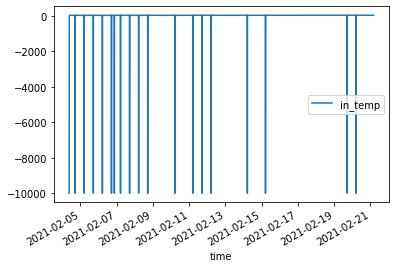

key:  refined_data Data Leangth: 24187 Data NaN Length: in_temp    4187
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00  -9999.0
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


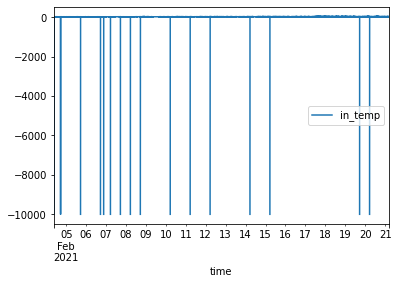

key:  datawithMoreCertainNaN Data Leangth: 24187 Data NaN Length: in_temp    4206
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      NaN
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


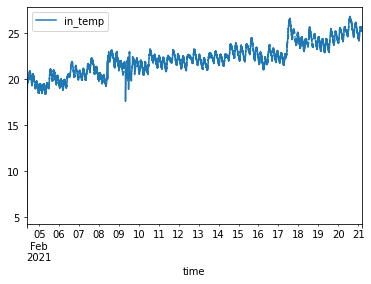

key:  datawithMoreUnCertainNaN Data Leangth: 24187 Data NaN Length: in_temp    4206
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      NaN
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


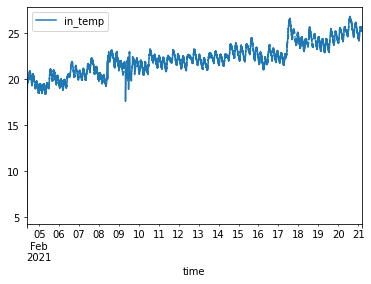

key:  imputed_data Data Leangth: 24187 Data NaN Length: in_temp    709
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      5.3
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


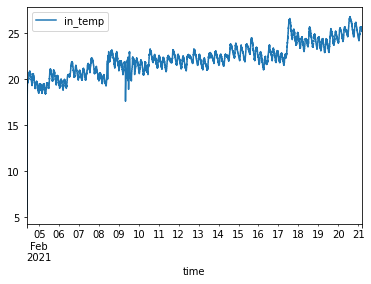

In [4]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    print(temp)
    temp.plot()
    plt.show()

In [5]:
output = data_preprocessing.ByAllMethod(output['imputed_data'][[column_name]], refine_param, outlier_param, imputation_param)

in_temp
getDataWithCertainNaN
getDataWithUncertainNaN
6.67438111447395 6.67438111447395
time
2021-02-04 09:14:00+00:00    NaN
2021-02-04 09:15:00+00:00    0.0
2021-02-04 09:16:00+00:00    1.3
2021-02-04 09:17:00+00:00    1.8
2021-02-04 09:18:00+00:00    1.4
                            ... 
2021-02-21 04:16:00+00:00    0.0
2021-02-21 04:17:00+00:00    0.0
2021-02-21 04:18:00+00:00    0.0
2021-02-21 04:19:00+00:00    0.0
2021-02-21 04:20:00+00:00    0.0
Freq: T, Name: in_temp, Length: 24187, dtype: float64
time
2021-02-04 09:14:00+00:00    NaN
2021-02-04 09:15:00+00:00    NaN
2021-02-04 09:16:00+00:00    1.3
2021-02-04 09:17:00+00:00    3.1
2021-02-04 09:18:00+00:00    3.2
                            ... 
2021-02-21 04:16:00+00:00    0.0
2021-02-21 04:17:00+00:00    0.0
2021-02-21 04:18:00+00:00    0.0
2021-02-21 04:19:00+00:00    0.0
2021-02-21 04:20:00+00:00    0.0
Freq: T, Name: in_temp, Length: 24187, dtype: float64
set()
SerialImputation
NaN Ratio: in_temp 2.93 %
linear
brits
brits_

key:  original Data Leangth: 24187 Data NaN Length: in_temp    709
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      5.3
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


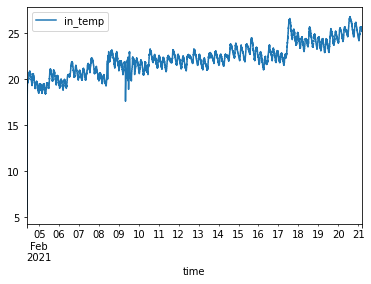

key:  refined_data Data Leangth: 24187 Data NaN Length: in_temp    709
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      5.3
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


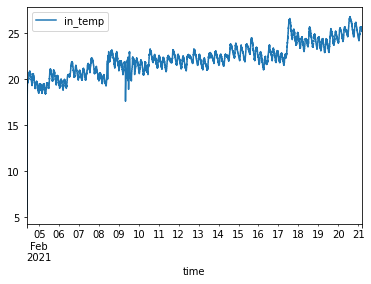

key:  datawithMoreCertainNaN Data Leangth: 24187 Data NaN Length: in_temp    709
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      5.3
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


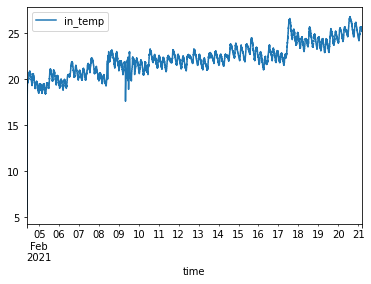

key:  datawithMoreUnCertainNaN Data Leangth: 24187 Data NaN Length: in_temp    709
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      5.3
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


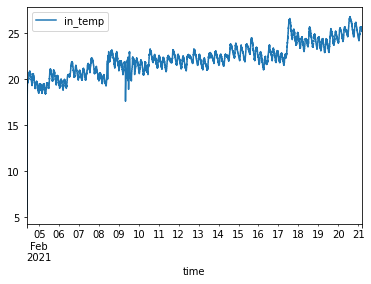

key:  imputed_data Data Leangth: 24187 Data NaN Length: in_temp    205
dtype: int64
                           in_temp
time                              
2021-02-04 09:14:00+00:00      5.3
2021-02-04 09:15:00+00:00      5.3
2021-02-04 09:16:00+00:00      6.6
2021-02-04 09:17:00+00:00      8.4
2021-02-04 09:18:00+00:00      9.8
...                            ...
2021-02-21 04:16:00+00:00     25.2
2021-02-21 04:17:00+00:00     25.2
2021-02-21 04:18:00+00:00     25.2
2021-02-21 04:19:00+00:00     25.2
2021-02-21 04:20:00+00:00     25.2

[24187 rows x 1 columns]


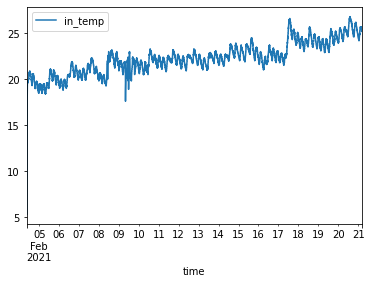

In [6]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    print(temp)
    temp.plot()
    plt.show()